In [1]:
%load_ext memory_profiler
# %matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib
import os
from fits_reader import shelf
from fits_reader import fits_reader
import importlib
import glob
importlib.reload(fits_reader)
importlib.reload(shelf)
import gc

arms = ["armS","armM","armL"]
home_directory = os.environ['HOME']
season_name = "/WSMR2021May/reduction/2021-06-23"
experiment_name = "/abs_calib/vis/"
experiment_directory = home_directory + season_name + experiment_name
eps_shelf = shelf.make_reduction_shelf(experiment_directory)

# /Volumes/ciber2/Data/WSMR2021May/reduction/2021-06-23/abs_calib/vis/OD3

<img src="./img/8_LVF/CIBER2_config.png" width="500">

/home/ciber2/python/main/calibration/fits_reader/shelf.py:81: RuntimeWarning: Mean of empty slice
  img = np.nanmean(imgs,axis=0)


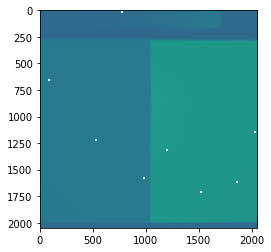

In [2]:
# eps_shelf.show_eps_image("OD3","armS")

img = eps_shelf.get_eps_img("OD3","armS")
fig,ax = plt.subplots()
ax.imshow(img)


/home/ciber2/python/main/calibration/fits_reader/shelf.py:81: RuntimeWarning: Mean of empty slice
  img = np.nanmean(imgs,axis=0)


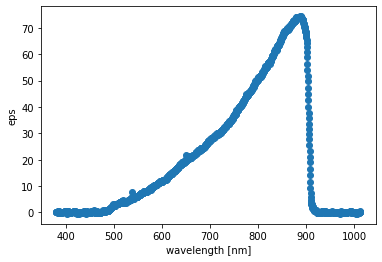

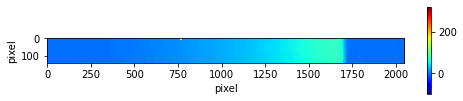

In [12]:
x_lvf, y_lvf = eps_shelf.getLVFxy("OD3","armS")
fig,ax = plt.subplots()
ax.scatter(x_lvf,y_lvf)
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("eps")


fig,ax = plt.subplots()
img = eps_shelf.get_LVF_img("OD3","armS")
ax.imshow(img)
ax.set_xlabel("pixel")
ax.set_ylabel("pixel")
im = ax.imshow(img,cmap = 'jet')
fig.colorbar(im,ax = ax,shrink=0.2)
fig.set_size_inches(8,8)

/home/ciber2/python/main/calibration/fits_reader/shelf.py:81: RuntimeWarning: Mean of empty slice
  img = np.nanmean(imgs,axis=0)


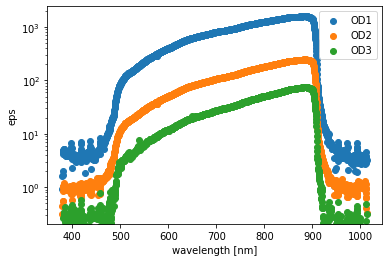

In [5]:
# _, eps_od1 = eps_shelf.getLVFxy("OD1","armS")
# _, eps_od2 = eps_shelf.getLVFxy("OD2","armS")
# _, eps_od3 = eps_shelf.getLVFxy("OD3","armS")
ODs = ["OD1","OD2","OD3"]
fig,ax = plt.subplots()
for OD in ODs:
    x_lvf, y_lvf = eps_shelf.getLVFxy(OD,"armS",)
    ax.scatter(x_lvf,y_lvf,label = OD)
ax.legend()
ax.set_ylabel("eps")
ax.set_xlabel("wavelength [nm]")
ax.set_yscale("log")